In [9]:
import os

dataset_path = r'C:\Users\SHREYA SANDIP PATIL\Downloads\archive (2)\Rice_Image_Dataset' 
print("Contents:", os.listdir(dataset_path))

Contents: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag', 'Rice_Citation_Request.txt']


In [11]:
import os

base_path = r"C:\Users\SHREYA SANDIP PATIL\Downloads\archive (2)\Rice_Image_Dataset"  
for root, dirs, files in os.walk(base_path):
    print(f"Current folder: {root}")
    
    if dirs:
        print("Subfolders:")
        for dir_name in dirs:
            print(f"    - {dir_name}")
    
    if files:
        print("Files:")
        for file_name in files[:5]: 
            print(f"    - {file_name}")
    
    print("-" * 60)


Current folder: C:\Users\SHREYA SANDIP PATIL\Downloads\archive (2)\Rice_Image_Dataset
Subfolders:
    - Arborio
    - Basmati
    - Ipsala
    - Jasmine
    - Karacadag
Files:
    - Rice_Citation_Request.txt
------------------------------------------------------------
Current folder: C:\Users\SHREYA SANDIP PATIL\Downloads\archive (2)\Rice_Image_Dataset\Arborio
Files:
    - Arborio (1).jpg
    - Arborio (10).jpg
    - Arborio (100).jpg
    - Arborio (1000).jpg
    - Arborio (10000).jpg
------------------------------------------------------------
Current folder: C:\Users\SHREYA SANDIP PATIL\Downloads\archive (2)\Rice_Image_Dataset\Basmati
Files:
    - Basmati (1).jpg
    - basmati (10).jpg
    - basmati (100).jpg
    - basmati (1000).jpg
    - basmati (10000).jpg
------------------------------------------------------------
Current folder: C:\Users\SHREYA SANDIP PATIL\Downloads\archive (2)\Rice_Image_Dataset\Ipsala
Files:
    - Ipsala (1).jpg
    - Ipsala (10).jpg
    - Ipsala (100).jpg
 

> Divides rice images into training and testing folders for each rice type.

In [19]:
import os
import shutil
from sklearn.model_selection import train_test_split

source_dir = r"C:\Users\SHREYA SANDIP PATIL\Downloads\archive (2)\Rice_Image_Dataset"         
train_dir = r"C:\Users\SHREYA SANDIP PATIL\Downloads\train_small"          # Path to store training images
test_dir = r"C:\Users\SHREYA SANDIP PATIL\Downloads\test_small"          # Path to store testing images

classes = ['Karacadag', 'Jasmine', 'Ipsala', 'Basmati', 'Arborio']

for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True) #destination folders for train and test sets
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    
for class_name in classes:                                 #Loop through each class and split images into train/test sets
    class_path = os.path.join(source_dir, class_name)  
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    train_imgs, test_imgs = train_test_split(images, test_size=0.2, random_state=42)

    for img in train_imgs:                        
        src = os.path.join(class_path, img)           #Copy training images
        dst = os.path.join(train_dir, class_name, img)
        shutil.copyfile(src, dst)
 
    for img in test_imgs:                       
        src = os.path.join(class_path, img)            #Copy testing images
        dst = os.path.join(test_dir, class_name, img)
        shutil.copyfile(src, dst)

print("Train and Test split completed successfully!")


Train and Test split completed successfully!


In [21]:
!pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/3c/e3/e868f1d5951047f950d2ba1e04a765a3328a51f06996b67976d6102f8227/tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/f6/d4/349f7f4bd5ea92dab34f5bb0fe31775ef6c311427a14d5a5b31ecb442341/absl_py-2.2.2-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/b8/25/155f9f080d5e4bc0082edfda032ea2bc2b8fab3f4d25d46c1e9dd22a1a89/flatbuffers-25.2.10-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/a3/61/8001b38461d751c

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.
numba 0.57.0 requires numpy<1.25,>=1.21, but you have numpy 2.1.3 which is incompatible.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.1.3 which is incompatible.


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import pandas as pd

In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = r"C:\Users\SHREYA SANDIP PATIL\Downloads\train_small"
valid_path = r"C:\Users\SHREYA SANDIP PATIL\Downloads\test_small"

classes = ['Karacadag', 'Jasmine', 'Ipsala', 'Basmati', 'Arborio']

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30
)

train_it = train_datagen.flow_from_directory(
    directory=train_path,
    class_mode='categorical',
    classes=classes,
    target_size=(128, 128),
    batch_size=32,
    seed=42
)

for class_name in classes:
    folder_path = os.path.join(train_path, class_name)
    if os.path.exists(folder_path):
        print(f"{class_name} folder exists with {len(os.listdir(folder_path))} files")
    else:
        print(f"{class_name} folder is missing!")

val_datagen = ImageDataGenerator(rescale=1./255)

val_it = val_datagen.flow_from_directory(
    directory=valid_path,
    class_mode='categorical',
    classes=classes,
    target_size=(128, 128),
    batch_size=32,
    seed=42
)

test_it = val_datagen.flow_from_directory(
    directory=valid_path,
    class_mode='categorical',
    classes=classes,
    target_size=(128, 128),
    batch_size=32,
    seed=42
)

batchX, batchy = train_it.next()
print('Batch shape =', batchX.shape)
print('Pixel range: min = %.3f, max = %.3f' % (batchX.min(), batchX.max()))


Found 60000 images belonging to 5 classes.
Karacadag folder exists with 12000 files
Jasmine folder exists with 12000 files
Ipsala folder exists with 12000 files
Basmati folder exists with 12000 files
Arborio folder exists with 12000 files
Found 15000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.
Batch shape = (32, 128, 128, 3)
Pixel range: min = 0.000, max = 1.000


In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy

In [12]:
model = Sequential()
model.add(Conv2D(32, (5,5),padding='valid',activation='relu',
                 input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(4,4)))
# REPEAT CONV AND POOLING layer 3 TIMES
model.add(Conv2D(64, (5,5),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Conv2D(128, (5,5),padding='valid',activation='relu'))
# model.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
# model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
# any no of dense layers
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(5,activation='softmax')) # Changed the output layer to 5 units

In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 51, 51, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 128)         204928    
                                                                 
 flatten_3 (Flatten)         (None, 8192)             

In [14]:
model.compile(
    optimizer='adam',
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [15]:
history = model.fit(
  train_it,
  validation_data=val_it,
  epochs=5)

Epoch 1/5
938/938 [==============================] - 1973s 2s/step - loss: 0.3142 - accuracy: 0.8703 - val_loss: 2.8624 - val_accuracy: 0.5927
Epoch 2/5
938/938 [==============================] - 1129s 1s/step - loss: 0.0875 - accuracy: 0.9689 - val_loss: 1.5219 - val_accuracy: 0.6987
Epoch 3/5
938/938 [==============================] - 1146s 1s/step - loss: 0.0570 - accuracy: 0.9805 - val_loss: 1.7859 - val_accuracy: 0.7230
Epoch 4/5
938/938 [==============================] - 1192s 1s/step - loss: 0.0415 - accuracy: 0.9865 - val_loss: 0.5707 - val_accuracy: 0.8598
Epoch 5/5
938/938 [==============================] - 1165s 1s/step - loss: 0.0402 - accuracy: 0.9869 - val_loss: 0.6930 - val_accuracy: 0.8659


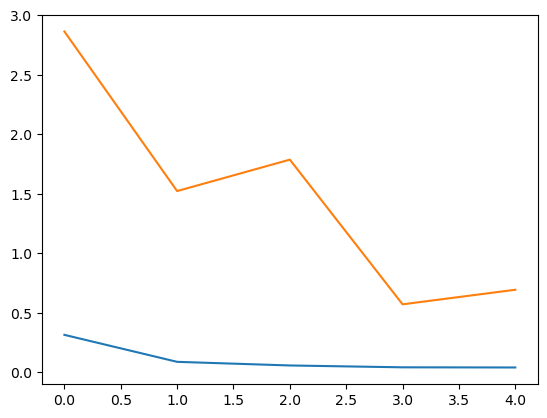

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

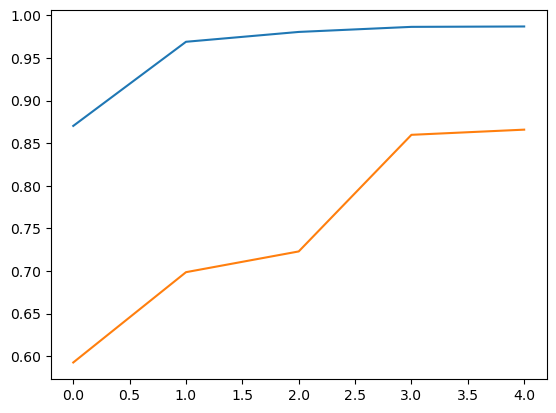

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [29]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

 > Loads the ResNet50 pre-trained model and adds a few dense and dropout layers.
 > Trains the ResNet50 model while freezing its layers to prevent overfitting.

In [33]:
base_model = MobileNetV2(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False 

In [37]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(len(classes), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer='adam',
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [39]:
history = model.fit(
    train_it,
    epochs=5,
    validation_data=val_it
)

Epoch 1/5
938/938 [==============================] - 1192s 1s/step - loss: 0.0945 - accuracy: 0.9676 - val_loss: 0.0925 - val_accuracy: 0.9659
Epoch 2/5
938/938 [==============================] - 1149s 1s/step - loss: 0.0651 - accuracy: 0.9777 - val_loss: 0.1128 - val_accuracy: 0.9609
Epoch 3/5
938/938 [==============================] - 1250s 1s/step - loss: 0.0562 - accuracy: 0.9806 - val_loss: 0.1721 - val_accuracy: 0.9399
Epoch 4/5
938/938 [==============================] - 1173s 1s/step - loss: 0.0543 - accuracy: 0.9815 - val_loss: 0.1383 - val_accuracy: 0.9530
Epoch 5/5
938/938 [==============================] - 1215s 1s/step - loss: 0.0518 - accuracy: 0.9823 - val_loss: 0.1292 - val_accuracy: 0.9555


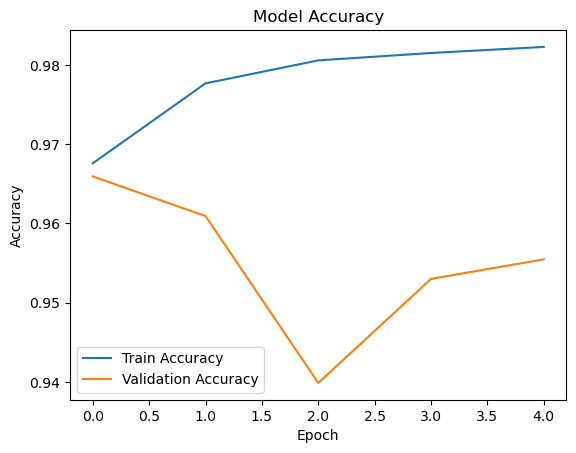

In [42]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import classification_report
import numpy as np

preds = model.predict(test_it)
y_pred = np.argmax(preds, axis=1)
y_true = test_it.classes

print(classification_report(y_true, y_pred, target_names=classes))


235/235 [==============================] - 172s 734ms/step
              precision    recall  f1-score   support

   Karacadag       0.20      0.18      0.19      3000
     Jasmine       0.19      0.21      0.20      3000
      Ipsala       0.20      0.20      0.20      3000
     Basmati       0.21      0.19      0.20      3000
     Arborio       0.20      0.22      0.21      3000

    accuracy                           0.20     15000
   macro avg       0.20      0.20      0.20     15000
weighted avg       0.20      0.20      0.20     15000



> Only 5 epochs were used to train the models due to time limitations and system constraints.
> More training epochs can help the model learn better.

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [4]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

In [5]:
for layer in base_model.layers:
    layer.trainable = False

In [6]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(5, activation='softmax')(x) 

In [7]:
model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

In [10]:
history = model.fit(
    train_it,
    validation_data=val_it,
    epochs=5,
    steps_per_epoch=train_it.samples // train_it.batch_size,
    validation_steps=val_it.samples // val_it.batch_size
)

Epoch 1/5
1875/1875 [==============================] - 1471s 783ms/step - loss: 1.3086 - accuracy: 0.4408 - val_loss: 0.7797 - val_accuracy: 0.7790
Epoch 2/5
1875/1875 [==============================] - 1464s 781ms/step - loss: 0.8684 - accuracy: 0.6347 - val_loss: 0.5953 - val_accuracy: 0.8429
Epoch 3/5
1875/1875 [==============================] - 1469s 784ms/step - loss: 0.7337 - accuracy: 0.6969 - val_loss: 0.5079 - val_accuracy: 0.8686
Epoch 4/5
1875/1875 [==============================] - 1493s 796ms/step - loss: 0.6663 - accuracy: 0.7212 - val_loss: 0.4532 - val_accuracy: 0.8962
Epoch 5/5
1875/1875 [==============================] - 1457s 777ms/step - loss: 0.6328 - accuracy: 0.7318 - val_loss: 0.4452 - val_accuracy: 0.8875


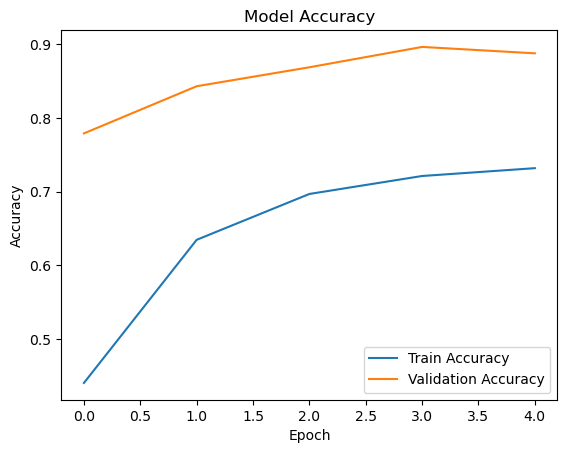

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import classification_report
import numpy as np
preds = model.predict(test_it)
y_pred = np.argmax(preds, axis=1)
y_true = test_it.classes

print(classification_report(y_true, y_pred, target_names=classes))

469/469 [==============================] - 256s 546ms/step
              precision    recall  f1-score   support

   Karacadag       0.20      0.23      0.21      3000
     Jasmine       0.20      0.15      0.17      3000
      Ipsala       0.20      0.23      0.21      3000
     Basmati       0.20      0.23      0.21      3000
     Arborio       0.21      0.16      0.18      3000

    accuracy                           0.20     15000
   macro avg       0.20      0.20      0.20     15000
weighted avg       0.20      0.20      0.20     15000



> Only 5 epochs were used to train the models due to time limitations and system constraints.
> More training epochs can help the model learn better.

> Why VGG16 Was Not Used : 
VGG16 is a heavy model with millions of parameters.
It requires more computing power and takes a lot of time to train.
Due to system limitations and the risk of crashes or long wait times.

In [16]:
model.save('rice_classifier_model.h5')